# Computational Methods in Economics

## Problem Set 2d - Pandas: Suggested Solutions

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2018-11-15 11:31:00.251196


## Question 1

Run the following cell from the lecture to load the data set on Bundesliga champions into a Pandas Series.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

Df = pd.read_csv('data/champions.csv')
ts = Df['Club']
## check series
ts.head()

1964                1. FC Köln
1965             Werder Bremen
1966          TSV 1860 München
1967    Eintracht Braunschweig
1968            1. FC Nürnberg
Name: Club, dtype: object

(a) How many clubs became champion at least once? How often was Bayern Munich champion?

(b) Use a Pandas command to see the first year in the data set. 

(c) Write a function that takes the data set and a year as arguments and prints the champion in this particular year. Which club won the championship in 1998? 

(d) Print out all clubs that were champions more than three times.

(e) Write a function that takes a series and returns the club that has won the second-most championships since 1964. Hint: Useful for this question are the **value_counts** and **argmax** methods, and logical arrays.

(f) Generate a bar chart with all champions since 1963/64, analogous to the one in the lecture. 

Bonus challenge: Answer question (f) *without using Pandas' plot method*. Compare the lecture notebook for help. You will need to find a way to get a list of all clubs in the data set, with each club appearing only once.

In [3]:
## (a): This information is provided in the describe method; alternatively, you can use the value_counts method
print(ts.describe())
print('')

## (b) 
print('The first observation is from {}.'.format(ts.index[0]) )
print('')

## (c)
def print_champ(ts, year):
    print('In {}, {} was Bundesliga champion.'.format(year, ts[year]) )

print_champ(ts, 1998)    
print('')

## (d)
first = ts.value_counts()
print(first.loc[ first > 3 ])
print('')

## (e)
def second_most(series):
    s_max = series.max()
    return series[ series < s_max ].idxmax()

print('{} has won the second-most championships since 1964.'.format( second_most(first) ) )


count                    55
unique                   12
top       FC Bayern München
freq                     27
Name: Club, dtype: object

The first observation is from 1964.

In 1998, 1. FC Kaiserslautern was Bundesliga champion.

FC Bayern München           27
Borussia Dortmund            5
Borussia Mönchengladbach     5
Werder Bremen                4
Name: Club, dtype: int64

Borussia Dortmund has won the second-most championships since 1964.


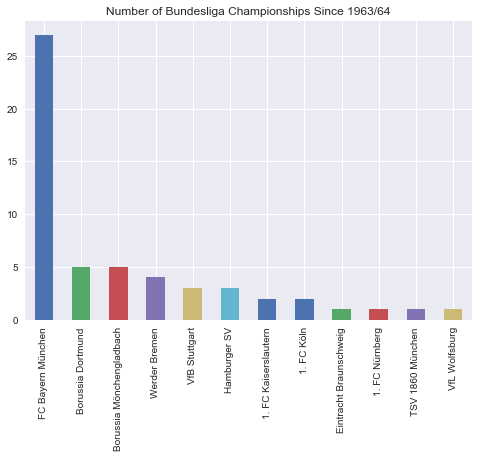

In [4]:
## question (f)
first = ts.value_counts()
first.plot(kind = 'bar', title = 'Number of Bundesliga Championships Since 1963/64')

Text(0.5,1,'Number of Bundesliga Championships Since 1963/64')

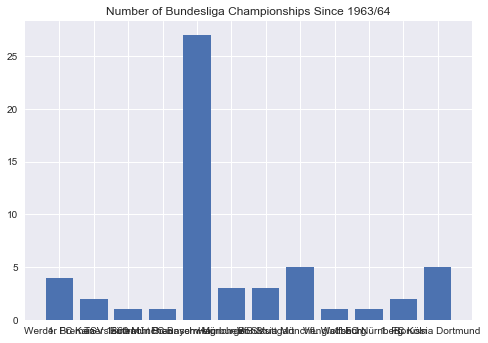

In [5]:
## alternative approach to create a bar chart
names = list(set(ts))
ts_num = ts.replace(names, range(0,len(names)))
count = ts_num.value_counts()

fig, ax = plt.subplots()
ax.bar(count.index, count)
ax.set_xticks(range(len(names)))
ax.set_xticklabels(names)
ax.set_title('Number of Bundesliga Championships Since 1963/64')

As an aside, if you don't the overlapping labels in the graph above, you can replace the names with abbreviations. here's a way to do this:

Text(0.5,1,'Number of Bundesliga Championships Since 1963/64')

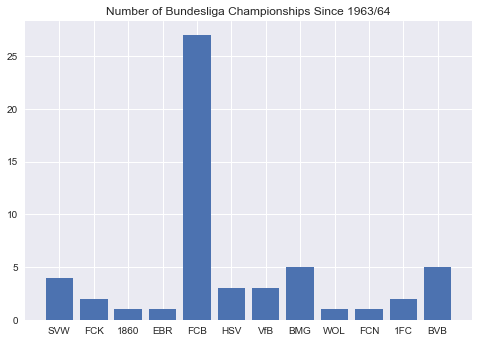

In [6]:
labels = {'FC Bayern München': 'FCB', 'Hamburger SV': 'HSV', 'Borussia Mönchengladbach': 'BMG', \
          'Werder Bremen': 'SVW', '1. FC Kaiserslautern': 'FCK', 'VfL Wolfsburg': 'WOL', \
          'Borussia Dortmund': 'BVB', 'TSV 1860 München': '1860', '1. FC Köln': '1FC', '1. FC Nürnberg': 'FCN', \
          'Eintracht Braunschweig': 'EBR', 'VfB Stuttgart': 'VfB'}
label_names = [labels[name] for name in names]

fig, ax = plt.subplots()
ax.bar(count.index, count)
ax.set_xticks(range(len(names)))
ax.set_xticklabels(label_names, fontsize=10)
ax.set_title('Number of Bundesliga Championships Since 1963/64')

## Question 2

Run the cell below which imports the data set on Bundesliga players and performs the same operations as in the lecture, in order to make last names the indices.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

df = pd.read_csv('data/BundesligaData.csv', sep = ';')

def reverse_name(name):
    L = name.split(" ")
    try:
        S = L[1] + " " + L[0]
    except:
        S = L[0]
    
    return S

df['name'] = df['name'].apply(reverse_name)
names = df['name'].str.split(expand=True)
# replace column 'name'
df['name'] = names[0]
## add column 'first name'
df['first_name'] = names[1]
## make name the index
df.set_index('name', drop = True, inplace = True)
## check dataframe
df.head()

,position,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode,first_name
name,,,,,,,,,,,,,,
Lewandowski,striker,80.0,80.0,28,30,4,5,0,4.2,75.0,1.8,7.71,3,Robert
Aubameyang,striker,65.0,65.0,27,29,2,3,0,3.6,70.3,1.3,7.40,3,Pierre-Emerick
Mueller,striker,60.0,75.0,27,5,12,0,0,2.2,76.2,1.8,7.30,3,Thomas
Reus,striker,40.0,50.0,27,5,4,1,1,2.3,74.6,0.4,7.03,3,Marco
Costa,striker,30.0,35.0,26,4,3,2,0,1.9,80.2,0.1,7.17,3,Douglas


(a) Who got the most scorer points in the 2016/17 season, and how many points did he get? A scorer point is awarded for both a goal and an assist.

(b) Are there any players in the data set that are younger than 25 and have scored more than 10 goals?

(c) At which positions do the players with the most red cards, the most yellow cards, and the most aerials won play?

(d) For the first five players, update the **'goals'** column with the the number of goals they scored on the matchday 34, namely {'Lewandowski' : 0, 'Aubameyang': 2, 'Mueller': 0, Costa': 0, 'Reus': 1}.

(e) At what age do players on average have the highest value? At what age the highest rating? Use the **groupby** and the **apply** method. 

(f) Write a function **standardize** that takes a series or dataframe column and standardizes its data, i.e. transforms each value by removing the mean and by dividing by the standard deviation:
\begin{equation}
    \tilde{x}_i = \frac{x_i - mean(x)}{std(x)}
\end{equation}
Use the **apply** to standardize the dataframe. Keep in mind that **apply** only works if all columns have the right data type; use **drop** to get rid of those column that don't.


In [8]:
## question (a)

## define a series called 'points'
points = df['goals'] + df['assists']
## use argmax and max methods
print(points.idxmax() )
print(points.max())

Lewandowski
34


In [9]:
## question (b)
A = (df['age'] < 25) & (df['goals'] >= 10)
# print( A.any() )

list(df.loc[A].index)

['Werner', 'Gnabry']

In [10]:
## question (c)
print( df['position'].loc[ df['red'].idxmax() ] )
print( df['position'].loc[ df['yellow'].idxmax() ] )
print( df['position'].loc[ df['aerialswon'].idxmax() ] )

midfielder
midfielder
striker


In [11]:
## question (d)
goals_34 = {'Lewandowski' : 0, 'Aubameyang': 2, 'Mueller': 0, 'Costa': 0, 'Reus': 1}
goals_34 = pd.Series(goals_34)
df['goals'] = df['goals'].add(goals_34, fill_value = 0)
df.head()

,position,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode,first_name
name,,,,,,,,,,,,,,
Lewandowski,striker,80.0,80.0,28,30.0,4,5,0,4.2,75.0,1.8,7.71,3,Robert
Aubameyang,striker,65.0,65.0,27,31.0,2,3,0,3.6,70.3,1.3,7.40,3,Pierre-Emerick
Mueller,striker,60.0,75.0,27,5.0,12,0,0,2.2,76.2,1.8,7.30,3,Thomas
Reus,striker,40.0,50.0,27,6.0,4,1,1,2.3,74.6,0.4,7.03,3,Marco
Costa,striker,30.0,35.0,26,4.0,3,2,0,1.9,80.2,0.1,7.17,3,Douglas


In [12]:
## question (e)
average_agegroups = df.groupby('age')['value', 'rating'].mean()
print( average_agegroups)
print('')
print('The players of age {} have on average the highest value.'.format( average_agegroups['value'].idxmax()) ) 
print('The players of age {} have on average the highest rating.'.format( average_agegroups['rating'].idxmax()) ) 

         value    rating
age                     
17    5.000000  6.860000
18    5.250000  6.625000
19   15.833333  6.483333
20    8.455882  6.632941
21   12.500000  6.844000
22    7.329545  6.775455
23    7.440000  6.896800
24    9.240385  6.770000
25    4.955357  6.838214
26    8.367188  6.770000
27   11.420000  6.904000
28   10.772727  6.808485
29    8.309524  6.928095
30    2.615385  6.760769
31    4.200000  6.748000
32    4.000000  7.086667
33    5.500000  6.942000
34    4.166667  7.140000
35    3.500000  7.200000
38    1.000000  6.510000

The players of age 19 have on average the highest value.
The players of age 35 have on average the highest rating.


In [13]:
## question (f)
def standardize(s):
    return (s - s.mean()) / s.std(ddof = 0)
df.drop('position', axis = 1, inplace = True)
df.drop('first_name', axis = 1, inplace = True)
df.apply(standardize)


,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode
name,,,,,,,,,,,,
Lewandowski,7.329282,5.956559,0.682253,6.710905,0.933778,0.820436,-0.355797,4.614000,-0.001185,0.217261,2.653811,1.221669
Aubameyang,5.799194,4.666624,0.403149,6.956208,0.054928,0.016744,-0.355797,3.752334,-0.535803,-0.228403,1.733328,1.221669
Mueller,5.289165,5.526581,0.403149,0.578335,4.449177,-1.188795,-0.355797,1.741781,0.135313,0.217261,1.436398,1.221669
Reus,3.249047,3.376689,0.403149,0.823638,0.933778,-0.786948,2.271629,1.885392,-0.046684,-1.030597,0.634688,1.221669
Costa,2.228988,2.086754,0.124046,0.333033,0.494353,-0.385102,-0.355797,1.310948,0.590307,-1.297995,1.050389,1.221669
Dembele,2.024976,1.484784,-1.550574,0.823638,4.009752,1.222282,-0.355797,0.880116,-0.933922,-1.208862,1.763021,1.221669
Schuerrle,1.514947,1.656775,0.124046,-0.157573,0.054928,0.016744,-0.355797,2.029003,-0.331055,-0.852331,0.218986,1.221669
Chicharito,1.412941,1.226797,0.682253,1.804849,0.054928,-0.786948,-0.355797,1.454559,-0.262806,-0.139270,0.011135,1.221669
Embolo,1.208929,0.968810,-1.550574,-0.157573,-0.384497,-1.188795,-0.355797,0.162061,-0.433429,-0.763199,0.308065,1.221669


## Question 3

The dataset used in this question comes from baseball, which may be a less-than exciting sport, but also one that generates a lot of data and is therefore very popular among (North American) data scientists. The file 'baseball_stats.csv' contains information on more than 18,000 players that have played in the US baseball league MLB at some point. The data includes the name, height and weight of a player, moreover its "handedness" (whether he bats with his left or right hand or both), his batting average (the percentage of at-bats in which he recorded a hit) and the number of home runs.

(a) Import the Pandas package and read the data in a Pandas dataframe. Use the **info** or the **head** method to make sure the data has been read in properly. 

(b) Find the player with the most homeruns in the history of the MLB. 

(c) How many players were recorded to be "switch hitters", i.e. to bat both left-handed or right-handed? Who has scored the most homeruns among this group?

(d) How often does an MLB player hit the ball on average? Using the **describe** method, you can see that the mean batting average is about 0.17. However, this includes a lot of players with an average of 0. Compute the mean batting average among those players who have actually hit something, i.e. with an average *greater than zero*.

(e) A popular question among baseball fans and analysts is whether there is a inherent difference in the batting performance between left- or right-handed batters. We can use a t-test to check the hypothesis that both groups come from the same population, i.e. that there is no systematic difference and all observed difference is due to sampling. Use the **ttest_ind** function in Scipy's **scipy.stats** module to compute a t-statistic under the null hypothesis
\begin{equation}
    \text{avg}_{LH} - \text{avg}_{RH} = 0.
\end{equation}
What can you conclude?


In [14]:
## Question (a)

df = pd.read_csv('data/baseball_stats.csv')
print(df.info())
print('')
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18177 entries, 0 to 18176
Data columns (total 6 columns):
name          18177 non-null object
handedness    16974 non-null object
height        18177 non-null object
weight        18177 non-null object
avg           18177 non-null float64
HR            18177 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 852.1+ KB
None

           name handedness height weight    avg   HR
0  Brandon Hyde          R     75    210  0.000    0
1   Carey Selph          R     69    175  0.277    0
2  Philip Nastu          L     74    180  0.040    0
3    Kent Hrbek          L     76    200  0.282  293
4   Bill Risley          R     74    215  0.000    0


In [15]:
## Question (b)
ind = df['HR'].idxmax()
print('The player with the most HRs in the history of baseball is {}.'.format(df['name'].loc[ind]) )

## alternative: sort_values and use iloc
# df.sort_values(by = 'HR', ascending = False, inplace = True)
# print('The player with the most HRs in the history of baseball is {}.'.format(df['name'].iloc[0]) )

The player with the most HRs in the history of baseball is Barry Bonds.


In [17]:
## Question (c)
switch = df['handedness'] == 'B'
## create a data set consisting of switch hitters only
df_switch = df.loc[switch]
print('{} players were switch hitters.'.format( len(df_switch) ) )
print('Among those, the player with the most HRs is {}.'.format( df_switch['name'].loc[df_switch['HR'].idxmax()] ) )

1121 players were switch hitters.
Among those, the player with the most HRs is Mickey Mantle.


In [18]:
## Question (d)
print(df.describe())

## create index for players with higher-than-zero batting average
index = df['avg'] > 0
print('Among players with a non-zero batting average, the mean average is {:.3}.'.format(df['avg'].loc[index].mean()) )

                avg            HR
count  18177.000000  18177.000000
mean       0.171787     15.105793
std        0.126401     49.853117
min        0.000000      0.000000
25%        0.074000      0.000000
50%        0.200000      0.000000
75%        0.252000      4.000000
max        1.000000    762.000000
Among players with a non-zero batting average, the mean average is 0.223.


In [19]:
## Question (e)

from scipy.stats import ttest_ind

## sample of batting averages for right-handed batters 
y0 = df['avg'].loc[df['handedness'] == 'R']
## sample of batting averages for left-handed batters 
y1 = df['avg'].loc[df['handedness'] == 'L']


stat = ttest_ind(y0, y1, equal_var = False)
print(stat)


Ttest_indResult(statistic=-9.9357022262420944, pvalue=3.8102742258887383e-23)


## Question 4
In this question we will use data from the Worldbank. There is a nice package called *wbdata*, which allows you to conveniently download all kinds of data from the Worldbank's databases to a Pandas dataframe. We will give you some instructions on how to use it, but also refer to http://wbdata.readthedocs.io/en/latest/ for a more detailed description of the package. To use *wbdata*, you first have to install the package by running *pip install wbdata* in a command window. You can then import it with **import wbdata**:

In [20]:
import wbdata

(a) In order to download data into a data frame using *wbdata*, we run the following function:
**df = wbdata.get_dataframe(indicators, country = countries)**

**countries** can be a single country or a list of countries. You need to use the usual country abbreviations here, e.g. **"DEU"** for Germany or **"GBR"** for United Kingdom. If you don't know a particular country code, you can run 
**wbdata.search_countries()** with the country name as an input:

In [21]:
wbdata.search_countries("Germany")

DEU	Germany


Note that the country argument is optional. Omitting it, i.e. running **df = wbdata.get_dataframe(indicators)**, will download data for all countries in the data set. Here, we will restrict ourselves to one "country", the world. Hence, we set **countries = "WLD"**. 

As an aside, if you download data for a list of countries or all countries, the resulting dataframe will have multiple row indices (a so-called *Multiindex* dataframe). We haven't talked about these in the lecture, so you might have to do some googling to get an idea how to work with them. As long as we use only one country when downloading data, this is not an issue.     

**indicators** is a dictionary that contains the data series you want to download (the keys) and the column names you want to give them (the values in the dictionary). For example, for downloading GDP, you can use: ** indicators = {''NY.GDP.MKTP.KD'': 'gdp'}**. We will give you the relevant names for solving the exercises below, but you can also browse the data base yourself. To list all available topics, use **wbdata.get_source()**. There is also a search function that allows you to search for specific data: **wbdata.search_indicators("Population")**

For this exercise, we download data on GPD (**'NY.GDP.MKTP.KD'**), "gross capital formation" (**'NE.GDI.TOTL.KD'**), greenhouse gas emissions (**'EN.ATM.GHGT.KT.CE'**) and population (**'SP.POP.TOTL'**) into a dataframe. To avoid missing values, we will use data from 1972 to 2012 in our analysis. The following code block will get you started:

In [22]:
indicators = {'NY.GDP.MKTP.KD':'gdp','NE.GDI.TOTL.KD':'gcf','EN.ATM.GHGT.KT.CE':'co2','SP.POP.TOTL':'pop'}
df = wbdata.get_dataframe(indicators, country = 'WLD')
start_year, end_year = '1972', '2012'
df = df.loc[start_year : end_year : -1] ## use data between start and end year and reverse order

As a last step, convert your data to "nicer" units. GDP and GCF are given in USD, convert them to trillion USD. Emissions are given in kilotons (kt) of CO2 equivalents, convert them to gigatons (Gt). Finally, convert populations to billions. 

In [23]:
## question (a)

df['gdp'] = df['gdp'] * 1e-12 ## conver GDP to trillion USD
df['gcf'] = df['gcf'] * 1e-12 ## conver investmebt to trillion USD
df['co2'] = df['co2'] * 1e-6  ## convert emissions to Gt
df['pop'] = df['pop'] * 1e-9  ## convert population to billion

## print out most recent values
print('Global GDP in 2012: {:.3} trillion USD'.format(df['gdp'].loc['2012'] ) )
print('Global investment in 2012: {:.3} trillion USD'.format(df['gcf'].loc['2012'] ) )
print('Global emissions in 2012: {:.3} GtCO2e'.format(df['co2'].loc['2012'] ) )
print('Global population in 2012: {:.3}'.format(df['pop'].loc['2012'] ) )
print('')

## check for missing data
print(df['gdp'].isnull().any().any(), df['gcf'].isnull().any().any(), df['pop'].isnull().any().any(), df['co2'].isnull().any().any())

Global GDP in 2012: 69.8 trillion USD
Global investment in 2012: 17.6 trillion USD
Global emissions in 2012: 53.5 GtCO2e
Global population in 2012: 7.1

False False False False


(b) The data set does not contain a time series for the stock of physical capital. We will use the data on gross 
capital formation (**'gcf'**) and what is called the *perpetual inventory method* to impute a time series for capital. 
The perpetual inventory method uses the familiar law of motion for the capital stock:
\begin{equation}
    K_{t+1} = (1 - \delta) K_t + I_t,
\end{equation}
where $I_t$ stands for investment. We have data for $I_t$ (gross capital formation) and can set a reasonable value for the annual depreciation rate $\delta$, say 0.08. Given an initial value for the capital stock $K_0$ (where 0 denotes our first year, i.e. 1972) we can compute the capital stock recursively. Of course, we don't have a direct observation for $K_0$. There is a way to approximate the initial capital stock, but let's skip this here for the sake of brevity. For the global economy, use $K_0 = 66.2$. 

Write a function that computes the evolution of the physical capital stock using the equation above and data on gross capital formation.

In [24]:
## question (b)
delta = 0.08
df['cap'] = df['gcf'].copy()
T = len(df['gcf'])

#     K0 = (df['gcf'].loc['1972':'1975']/df['gdp'].loc['1972':'1975']).mean() / delta * df['gdp'].loc['1972']
K0 = 66.2
df['cap'].iloc[0] = K0
for t in range(T-1):
     df['cap'].iloc[t+1] = (1 - delta) * df['cap'].iloc[t] + df['gcf'].iloc[t]
            
print('Approximated global capital stock in 2012: {:.4} trillion USD'.format(df['cap'].loc['2012'] ) )            

Approximated global capital stock in 2012: 152.9 trillion USD


(c) Visualize the relationship between global GDP and global CO2 emissions by plotting their evolution over time in one graph. 

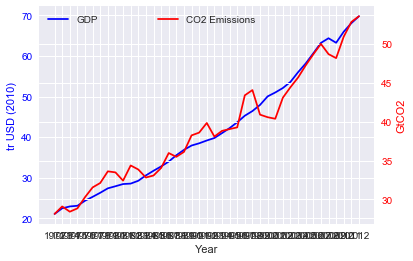

In [25]:
## question (c)

## one nice approach is the twinx method
fig, ax1 = plt.subplots()
ax1.plot(df['gdp'], color = 'b', label = "GDP")
ax2 = ax1.twinx()
ax2.plot(df['co2'], color = 'r', label = 'CO2 Emissions')

ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('tr USD (2010)', color='b')
ax1.tick_params('y', colors='b')

ax2.set_ylabel('GtCO2', color='r')
ax2.tick_params('y', colors='r')
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper center')
plt.show()

(d) Finally, we are going to run some simple growth regressions. Assume global production can be represented by a Cobb-Douglas function using capital and labor (here proxied by population):

\begin{equation}
    Y_t = A_t K_t^\alpha L_t^{1 - \alpha}.
\end{equation}

Assume total factor productivity $A_t$ grows with a constant rate: $A_t = A_0 \exp(g t)$. Taking logs gives:

\begin{equation}
    \ln Y_t = \ln A_0 + g t + \alpha \ln K_t + (1 - \alpha) \ln L_t.
\end{equation}

Since we are interested in estimating the coefficient $\alpha$, it makes sense to rearrange the terms in the following way:

\begin{equation}
    \ln (Y_t / L_t) = \ln A_0 + g t + \alpha \ln (K_t / L_t).
\end{equation}

This is our regression equation: we regress the log of GDP per capita on the log of per-capita input of capital, as well as a time indicator and a constant. 

Use the statsmodels package to run this regression with the data downloaded above. Then, run a second regression where you also include CO2 emissions as an additional factor of production. The production function in this case is given by:

\begin{equation}
    Y_t = A_t K_t^\alpha E_t^{\gamma} L_t^{1 - \alpha - \gamma},
\end{equation}

and hence the regression equation reads:

\begin{equation}
    \ln (Y_t / L_t) = \ln A_0 + g t + \alpha \ln (K_t / L_t) + \gamma \ln (E_t \ L_t).
\end{equation}

In [26]:
## question (d)
import statsmodels.formula.api as sm

Note that there are different ways to proceed here. Below, I add the logarithmized variables (as well as a time indicator) to the dataframe **df** and then use statsmodels' formula package to run the regression.

In [27]:
df['y'] = np.log(df['gdp'] / df['pop'])
df['k'] = np.log(df['cap'] / df['pop'])
df['e'] = np.log(df['co2'] / df['pop'])
df['t'] = range(41)

res = sm.ols(formula = "y ~ k + t", data = df).fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1547.
Date:                Thu, 15 Nov 2018   Prob (F-statistic):           3.92e-37
Time:                        11:40:38   Log-Likelihood:                 105.12
No. Observations:                  41   AIC:                            -204.2
Df Residuals:                      38   BIC:                            -199.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1925      0.216      5.526      0.0

In [28]:
import statsmodels.formula.api as sm

df['y'] = np.log(df['gdp'] / df['pop'])
df['k'] = np.log(df['cap'] / df['pop'])
df['e'] = np.log(df['co2'] / df['pop'])
df['t'] = range(41)

res = sm.ols(formula = "y ~ k + e + t", data = df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1321.
Date:                Thu, 15 Nov 2018   Prob (F-statistic):           1.16e-37
Time:                        11:40:46   Log-Likelihood:                 110.68
No. Observations:                  41   AIC:                            -213.4
Df Residuals:                      37   BIC:                            -206.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9831      0.201      4.899      0.0